In [1]:
# run this cell
import pandas as pd
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# <div align="center"> Data Science Life Science Cycle Demo

**Created By: Edwin Vargas Navarro (jedwin321@berkeley.edu)**

# Table of Contents
1. Formulating Questions + Thinking of Problems
    - Spotify Dataset
    - What is the most popular song in each month and their tempo?
<br/><br/>
2. Collecting + Cleaning Data
    - Getting Month from year-month-day format 
    - Convert Month Number to Month Name
<br/><br/>
3. Exploratory Data Analysis
    - Answering the question
    - What do we observe?
<br/><br/>
4. Making Conclusions, Solutions, + Recommended Actions
    - What do our observations tell us?
    
    

## Spotify Column Descriptions

Here are the descriptions of the columns for your reference. We may not be using all of these fields, but you can still take a look at its description.

|Variable Name   | Description |
|--------------|------------|
|`track_id` | 	Song unique ID |
|`track_name` | Song name |
|`track_artist	`| Song artist |
|`track_popularity` | Song popularity (0-100), where higher is better |
|`track_album_id`| Album unique ID |
|`track_album_name` | Song album name |
|`track_album_release_date`| Date when album was released |
|`playlist_name`| Name of playlist |
|`playlist_id`| Playlist ID |
|`playlist_genre`| Playlist genre |
|`playlist_subgenre	`|  Playlist subgenre |
|`danceability`| Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|`energy`| Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|`key`| The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 1 = C♯/D♭, 2 = D, and so on). If no key was detected, the value is -1. |
|`loudness`|  The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 dB and 0 dB. |
|`mode`|  Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
|`speechiness`|  Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|`acousticness`|  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
|`instrumentalness`| Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|`liveness`| Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|`valence`| A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). |
|`tempo`| The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|`duration_ms`| Duration of song in milliseconds |
|`creation_year`| Year when album was released |

## 1. Formulating Questions + Thinking of Problems
### Spotify Dataset

In [2]:
# Loading the Spotify data
spotify = Table.read_table('/home/jovyan/BUDS-SU23/Project/Spotify/data/spotify.csv')
spotify

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,creation_year
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102,0,0.0653,0.518,122.036,194754,2019
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.00421,0.357,0.693,99.972,162600,2019
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,2.33e-05,0.11,0.613,124.008,176616,2019
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.93,7,-3.778,1,0.102,0.0287,9.43e-06,0.204,0.277,121.956,169093,2019
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.65,0.833,1,-4.672,1,0.0359,0.0803,0,0.0833,0.725,123.976,189052,2019
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.127,0.0799,0,0.143,0.585,124.982,163049,2019
2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.187,0,0.176,0.152,112.648,187675,2019
6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,4.83e-06,0.111,0.367,127.936,207619,2019
7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,3.97e-06,0.637,0.366,127.015,193187,2019
1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.032,0.0567,0,0.0919,0.59,124.957,253040,2019


## What is tempo?

"The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."

##  What is the most popular song in each month and their tempo?

**Significance:** This is a question I asked myself because previously in the Recap of Apply demo I (Edwin) created a fuction that added a column `creation_month`. This gave me the month when a song was released, which allowed me to group based off of months. From there I saw the column `tempo` which was interesting because tempo is a big part of music. I wondered what was the most popular song in each month an their tempo. This might be an indication to what type of songs could be sucessful during certain months. 

## Alternate Question: What is the average tempo of each month?

**Significance:** This is an extension of the previous question. This now looks into the average tempo based on months. This would be nice to compare if certain months have a more general tempo for songs. Potentially useful for song writers or people who like playing songs. A general tempo may be the best for a particular season.

## 2. Collecting + Cleaning Data

In [3]:
# Notice how this column has the type of year-month-day
# What if we wish to see particular months?

spotify.column("track_album_release_date")

array(['2019-06-14', '2019-12-13', '2019-07-05', ..., '2014-04-21',
       '2014-01-01', '2014-03-03'], dtype='<U10')

## Getting Months 

`str.split(separator)` Splits the string (str) into a list based on the separator that is passed in

In [4]:
# This makes a LIST of each string separated by '-' 
Example = '2019-06-14'.split("-")
Example

['2019', '06', '14']

In [5]:
# In order to get our desired month number, we index by [1] since it is in the first index
Example[1]

'06'

In [6]:
# Now, lets create a function to get months. Notice how I factored in the possibility if the month is not present.
def get_month(date):
    split = date.split("-")
    if len(split) == 3:
        return split[1]
    else:
        return "nan"

In [7]:
months = spotify.apply(get_month, "track_album_release_date")
spotify = spotify.with_column("creation_month", months)
spotify.select("track_name", "track_artist", "track_album_release_date", "creation_month")

track_name,track_artist,track_album_release_date,creation_month
I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,2019-06-14,06
Memories - Dillon Francis Remix,Maroon 5,2019-12-13,12
All the Time - Don Diablo Remix,Zara Larsson,2019-07-05,07
Call You Mine - Keanu Silva Remix,The Chainsmokers,2019-07-19,07
Someone You Loved - Future Humans Remix,Lewis Capaldi,2019-03-05,03
Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,2019-07-11,07
Never Really Over - R3HAB Remix,Katy Perry,2019-07-26,07
Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,2019-08-29,08
Tough Love - Tiësto Remix / Radio Edit,Avicii,2019-06-14,06
If I Can't Have You - Gryffin Remix,Shawn Mendes,2019-06-20,06


In [8]:
# Now, we can use this data by filtering by months
spotify.group("creation_month").show()

creation_month,count
01,5092
02,1613
03,2011
04,1900
05,2213
06,2390
07,2009
08,2298
09,2532
10,3086


## Changing Month Number to Month Name

In [9]:
def month_num_to_name(number):
    if number == "01":
        return "January"
    elif number == "02":
        return "February"
    elif number == "03":
        return "March"
    elif number == "04":
        return "April"
    elif number == "05":
        return "May"
    elif number == "06":
        return "June"
    elif number == "07":
        return "July"
    elif number == "08":
        return "August"
    elif number == "09":
        return "Semptember"
    elif number == "10":
        return "October"
    elif number == "11":
        return "November"
    elif number == "12":
        return "December"
    else:
        return "nan"

In [10]:
# This shows we have sucessfully created columns that represent the months
spotify = spotify.with_column("Month Name", spotify.apply(month_num_to_name, "creation_month"))
spotify.select("track_album_release_date", "creation_month", "Month Name")

track_album_release_date,creation_month,Month Name
2019-06-14,06,June
2019-12-13,12,December
2019-07-05,07,July
2019-07-19,07,July
2019-03-05,03,March
2019-07-11,07,July
2019-07-26,07,July
2019-08-29,08,August
2019-06-14,06,June
2019-06-20,06,June


## 3. Exploratory Data Analysis

In [11]:
# Getting the necessary columns
spotify_subset = spotify.select("Month Name", "creation_year", "track_name", 'track_artist', "track_popularity", "tempo")
spotify_subset

Month Name,creation_year,track_name,track_artist,track_popularity,tempo
June,2019,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,122.036
December,2019,Memories - Dillon Francis Remix,Maroon 5,67,99.972
July,2019,All the Time - Don Diablo Remix,Zara Larsson,70,124.008
July,2019,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,121.956
March,2019,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,123.976
July,2019,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,124.982
July,2019,Never Really Over - R3HAB Remix,Katy Perry,62,112.648
August,2019,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,127.936
June,2019,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,127.015
June,2019,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,124.957


In [12]:
# Getting the most popular song in each month and removing the rest through double sort
pop_monthly_tempo = spotify_subset.sort("track_popularity", descending = True).sort("Month Name", distinct = True)
pop_monthly_tempo = pop_monthly_tempo.take(make_array(4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2, 12)) # Sorts by Jan - Dec
pop_monthly_tempo.show()

Month Name,creation_year,track_name,track_artist,track_popularity,tempo
January,2020,Yummy,Justin Bieber,95,145.841
February,2019,7 rings,Ariana Grande,90,140.048
March,2019,bad guy,Billie Eilish,95,135.128
April,2018,lovely (with Khalid),Billie Eilish,89,115.284
May,2019,Someone You Loved,Lewis Capaldi,94,109.891
June,2019,Señorita,Shawn Mendes,93,116.947
July,2019,Ride It,Regard,94,117.948
August,2019,hot girl bummer,blackbear,94,129.989
Semptember,2019,Memories,Maroon 5,98,91.019
October,2019,Dance Monkey,Tones and I,100,98.027


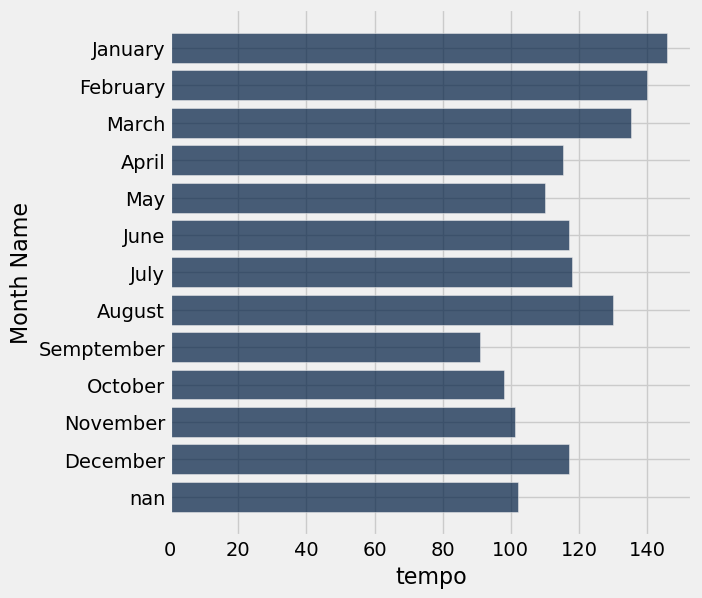

In [13]:
# Many ways to sort. One way is by month order. 
pop_monthly_tempo.barh("Month Name", "tempo")

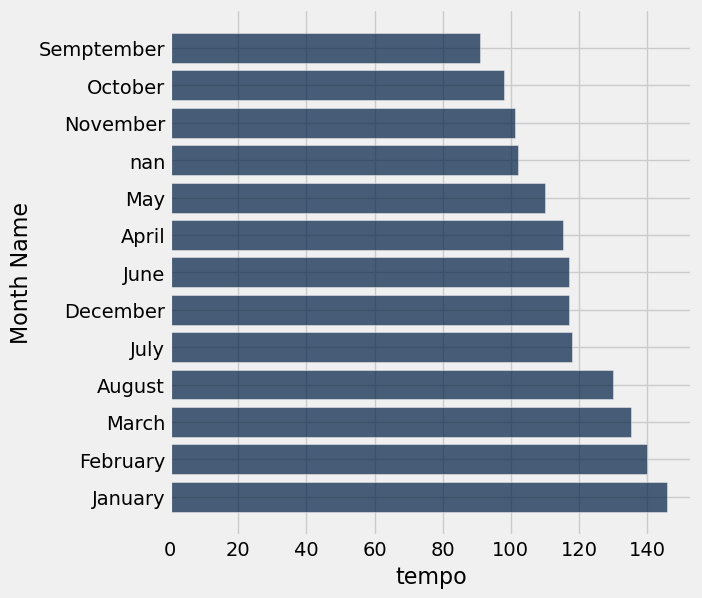

In [14]:
# Another way is sorting by tempo. We see that January - March have the highest tempos.
pop_monthly_tempo.sort("tempo").barh("Month Name", "tempo")

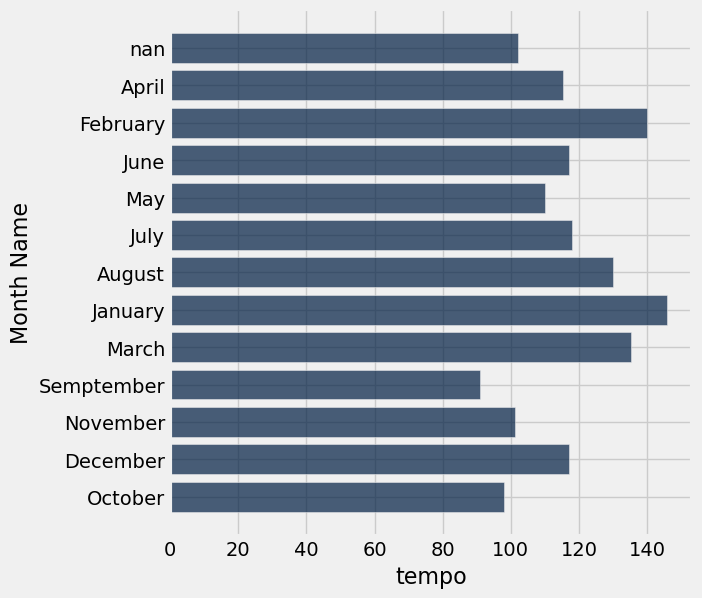

In [15]:
# Finally another way is by sorting from least popular tract to most. Even though January had the highest tempo, 
# October with a tempo of 98.027 has the most popular song.
pop_monthly_tempo.sort("track_popularity").barh("Month Name", "tempo")

## 4. Making Conclusions, Solutions, + Recommended Actions

**Conclusions:** We observed that months January - March had the top three most upbeat / high tempo popular songs. Albeit, the most popular songs were not in these months, rather they were in October, December, and November with a substantial decrease in tempo ~ 30 - 45 beats per minute (bpm) less. A potential trend for tempo + months and popularity.
<br/><br/>
**Solutions:** For artists interested in following the example of the best song for each month, you should look at your planned month release and the tempo of the most popular song. Early in the year they should be upbeat around 130-140 bpm, with a gradual decrease (exception is August), and starting in September and onwards the song bpm should be slower but bpm increases til December. There seems to be a trend of bpm and how songs perform during each month.
<br/><br/>
**Recommended Actions / Extension:** This only looked at the best song in each month, now as an extension we should look into the top n songs for each month and get their average. Maybe January has both really good low and high bpm songs. Also we can look into the average bpm for each month. Since this was advice based on the best song in each month and not the average. 
<br/><br/>

## Live Lecture Questions
